<a href="https://colab.research.google.com/github/HanaeELMEKKI/INSE_6220_Project/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#INSE_6220_Project
!pip uninstall numpy
!pip install numpy==1.20.1

import numpy as np
print (np.__version__)

# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Found existing installation: numpy 1.24.2
Uninstalling numpy-1.24.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.9
    /usr/local/lib/python3.9/dist-packages/numpy-1.24.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.9/dist-packages/numpy/*
Proceed (Y/n)?   ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.1-cp39-cp39-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages 

in order to have just numeric values, 
we replace the character in the first column "Sex" by numbers. That means:
M =0
F=1
I=2

The name of columns were reduced to avoid chauvechement in the plots :

Length = LE
Diameter = DI
Height = HE
Whole Weight = WW
Shucked Weight = SW
Viscera Weight = VW
Shell Weight = SHW
Rings = RI
Dataset

The datasets groups/ holds/ contains/ classify eryhemato-Squamos dermatology diseases and classify them in 6 groups : psoriasis, seboreic dermatitis, lichen planus,pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.
Datasets contains 366 instances (rows) and 34 attributes , 12 represent patients features and 22 are histopathological features. 
Every feature has a value from 0 to 3, except, the linear feature age (of patients):

 0 indicates that the feature was not present, 
 3 indicates the largest amount possible,
 1, 2 indicate the relative intermediate values.

Attribute Information:
      Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
      1: erythema
      2: scaling
      3: definite borders
      4: itching
      5: koebner phenomenon
      6: polygonal papules
      7: follicular papules
      8: oral mucosal involvement
      9: knee and elbow involvement
     10: scalp involvement
     11: family history, (0 or 1)
     34: Age (linear)

     Histopathological Attributes: (take values 0, 1, 2, 3)
     12: melanin incontinence
     13: eosinophils in the infiltrate
     14: PNL infiltrate
     15: fibrosis of the papillary dermis
     16: exocytosis
     17: acanthosis
     18: hyperkeratosis
     19: parakeratosis
     20: clubbing of the rete ridges
     21: elongation of the rete ridges
     22: thinning of the suprapapillary epidermis
     23: spongiform pustule
     24: munro microabcess
     25: focal hypergranulosis
     26: disappearance of the granular layer
     27: vacuolisation and damage of basal layer
     28: spongiosis
     29: saw-tooth appearance of retes
     30: follicular horn plug
     31: perifollicular parakeratosis
     32: inflammatory monoluclear inflitrate
     33: band-like infiltrate
 
The measurement were conducted through the analysis of samples under a microscope.

https://archive.ics.uci.edu/ml/datasets/seeds

In [37]:
#read cvs file into dataframe -final-data
df = pd.read_csv('https://raw.githubusercontent.com/HanaeELMEKKI/INSE_6220_Project/main/Abalone-data.csv')
df.head(25)

,LE,DI,HE,WW,SW,VW,SHW,RI,Class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Age 11-30.5
1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,Age 11-30.5
2,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,Age 11-30.5
3,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,Age 11-30.5
4,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14,Age 11-30.5
5,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190,11,Age 11-30.5
6,0.500,0.400,0.130,0.6645,0.2580,0.1330,0.240,12,Age 11-30.5
7,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.075,11,Age 11-30.5
8,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.270,12,Age 11-30.5
9,0.560,0.440,0.140,0.9285,0.3825,0.1880,0.300,11,Age 11-30.5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LE      598 non-null    float64
 1   DI      598 non-null    float64
 2   HE      598 non-null    float64
 3   WW      598 non-null    float64
 4   SW      598 non-null    float64
 5   VW      598 non-null    float64
 6   SHW     598 non-null    float64
 7   RI      598 non-null    int64  
 8   Class   598 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 42.2+ KB


In [39]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [40]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Exploratory Data Analysis

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

In [ ]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [ ]:
X = df.drop(columns=['Class'])
X.head(10)

In [ ]:
X.describe().transpose()

Standardize the Data

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

In [ ]:
X.describe().transpose()

Observations and variables

In [ ]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

In [ ]:
#plt.figure(figsize=(16, 16))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Principal Component Analysis (PCA)

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(1-8 Rings)->1,  2(9-10 Rings)->2, 3(11-29 Rings)->3
#idx_R7 = np.where(df['Class'] == 7)
#idx_R9 = np.where(df['Class'] == 9)
#idx_R10 = np.where(df['Class'] == 10)
idx_R1 = np.where(df['Class'] == 'Age 1-9.5')
idx_R2 = np.where(df['Class'] == 'Age 9-11.5')
idx_R3 = np.where(df['Class'] == 'Age 11-30.5')

plt. figure()
plt.scatter(Z[idx_R1,0], Z[idx_R1,1], c='r', label='1-8 Rings')
plt.scatter(Z[idx_R2,0], Z[idx_R2,1], c='g', label='9-10 Rings')
plt.scatter(Z[idx_R3,0], Z[idx_R3,1], c='b', label='11-29 Rings')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

Eigenvectors

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Explained Variance

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Biplot

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('')
plt.ylabel('')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_R1,0], Z[idx_R1,1], c='r', label='7 Rings')
plt.scatter(Z[idx_R2,0], Z[idx_R2,1], c='g', label='9 Rings')
plt.scatter(Z[idx_R3,0], Z[idx_R3,1], c='b', label='10 Rings')
plt.legend(loc='upper left')

### **Using PCA Library**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

**Principal Components**

In [ ]:
out['PC']

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [598] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [598] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [98.29%] of the variance'}, xlabel='PC1 (90.2% expl.var)', ylabel='PC2 (4.09% expl.var)'>)

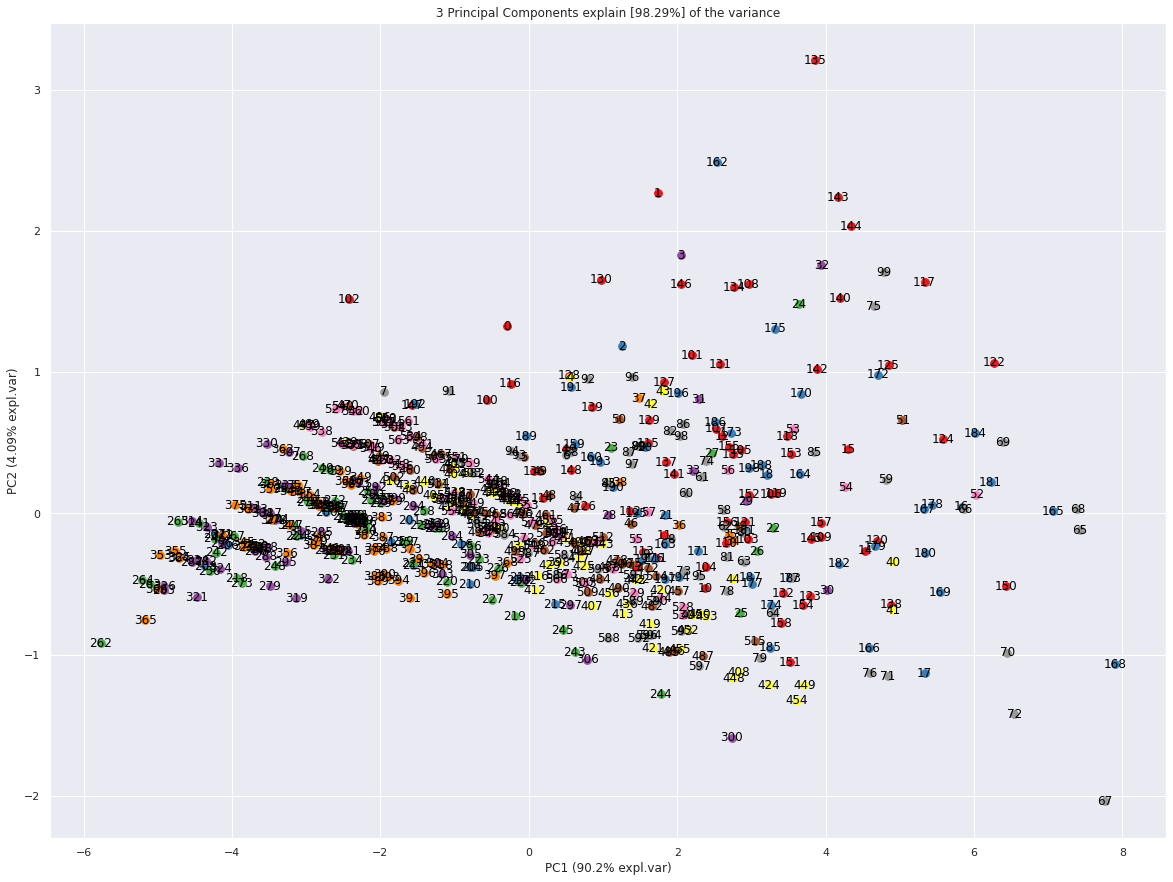

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

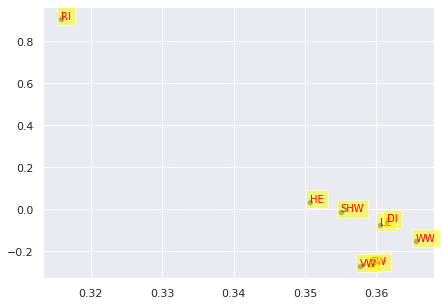

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i],y=A.PC2[i], s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

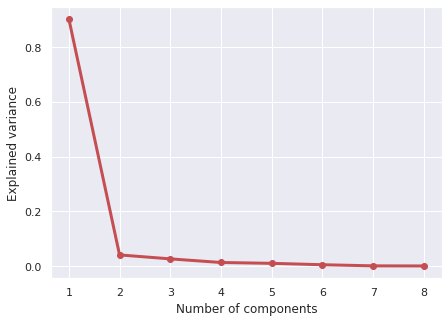

In [ ]:

VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()
     

**Explained Variance Plot**

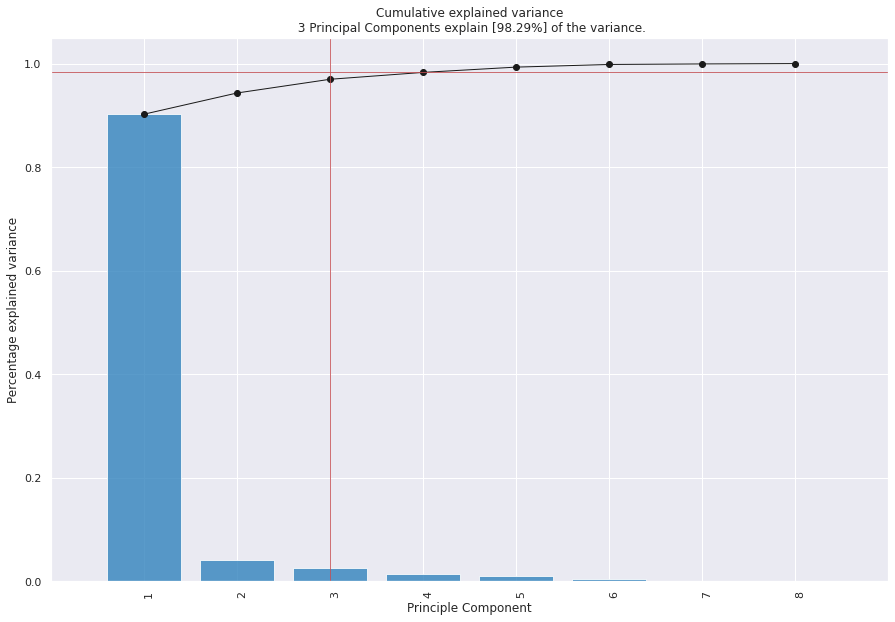

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [598] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [598] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [98.29%] of the variance'}, xlabel='PC1 (90.2% expl.var)', ylabel='PC2 (4.09% expl.var)'>)

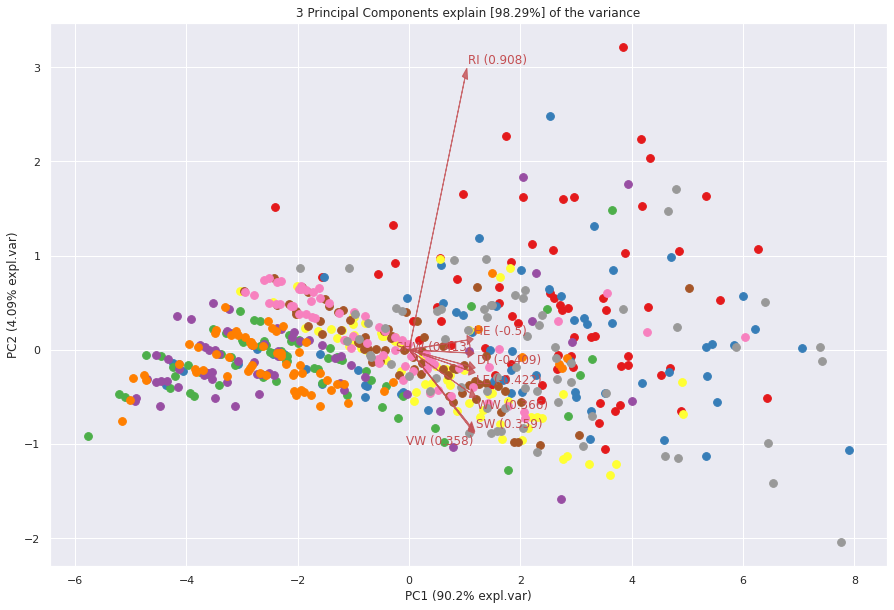

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [598] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [598] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 2 Axes>,
 <Axes3D:title={'center':'3 Principal Components explain [98.29%] of the variance'}, xlabel='PC1 (90.2% expl.var)', ylabel='PC2 (4.09% expl.var)'>)

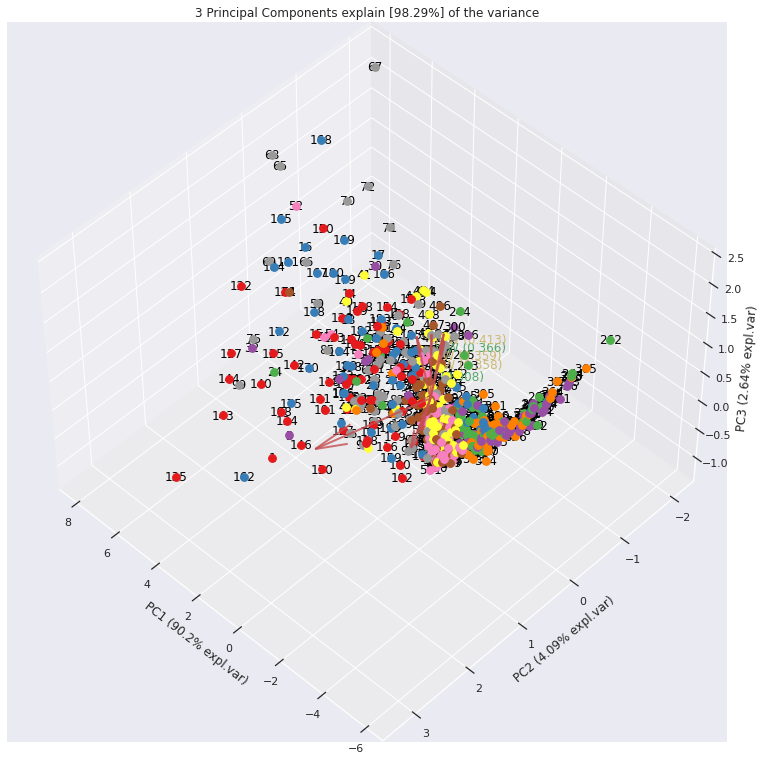

In [ ]:

model.biplot3d(legend=False)

# **Classification**

**Using PyCaret**

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:

data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (538, 9)
Unseen Data For Predictions: (60, 9)


**Setting up the Environment in PyCaret**

In [ ]:

from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"Age 1-9.5: 0, Age 11-30.5: 1, Age 9-11.5: 2"
4,Original Data,"(538, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
!pip uninstall numpy
!pip install numpy == 1.22.0
best_model = compare_models() 

""


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 2
INFO:logs:[]
INFO:logs:compare_models() succesfully completed......................................
